# Prediction on Cryptocurrency Prices

### Question ：Predicting Cryptocurrency Prices 

#### Background: 

How can we predict the price of cryptocurrencies? This is not only a question that concerns all cryptocurrency researchers and investors, but also an important step for us to know more about cryptocurrency. By predicting the price of different cryptocurrencies, we can compare our model's prediction with the current price of cryptocurrencies on the market and identify if any crypto is over-priced or under-priced. If our models are accurate, we can invest into the cryptos that are undervalued, and short the ones that are over-valued, and anticipate potential market correction.

A common method for price prediction are regression-based strategies. The problem to be solved, is understanding the relationship between the price and other noticeable characteristics of cryptocurrency. 

In this question, we want to find the best model to predict prices of different cryptocurrencies (target variable) based on their characteristics.The variables include cmc_rank,volume_24h,percent_change_7d,market_cap, 'binance-smart-chain','collectibles-nfts','defi','mineable',circulating/total_supply.  ( Please refer to README for more information on the columns.)

The metric we will be using to analyze each model is MSE.




#### Structure of this Notebook: 
- Linear Regression
- Polynomial Regression
- Lasso & Ridge Regression
- Conclusion & Future Work
- Reference
- Appendix

In [31]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.datasets import load_diabetes
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Additional Data Cleaning

In [32]:
# setting the number to numeric for clear representation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [33]:
crypto = pd.read_csv("crypto_cleaned_final.csv")
crypto = crypto.set_index('slug')

In [34]:
crypto.head()


,cmc_rank,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable',circulating/total_supply,price
slug,,,,,,,,,,
cardano,0.00000,3.97463,12.82723,100.00000,100.00000,0.00000,0.00000,100.00000,2.12253,2.25813
binance-coin,0.03711,2.65625,15.41839,98.03027,100.00000,0.00000,0.00000,0.00000,2.19489,421.64318
tether,0.07421,100.00000,12.95234,94.07876,100.00000,0.00000,0.00000,0.00000,2.09153,1.00018
xrp,0.11132,6.29600,14.30666,67.40079,0.00000,0.00000,0.00000,0.00000,1.02617,1.04262
solana,0.14842,5.38926,15.06570,66.55776,0.00000,0.00000,0.00000,0.00000,1.29304,161.68237


In [35]:
#check again if there are null and infinite values
crypto.isnull().sum()
crypto.iloc[crypto.values==np.inf]

,cmc_rank,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable',circulating/total_supply,price
slug,,,,,,,,,,


In [36]:
X = crypto.drop(['price'],axis =1)
Y = crypto['price']

In [37]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

## 1. Linear Regression

In [38]:
# Get the linear regression model 
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)
print(lm.coef_)

[-1.54424949e-01 -2.90042408e+00 -1.89008848e-02  2.89183421e+00
  9.48456648e-04  4.25602706e-02  3.88111846e-02 -1.95864495e-02
  3.91294000e+00]


In [39]:
# Get the linear regression result
print("Training R-squared: ", lm.score(X_train,y_train))
print("Testing R-squared: ", lm.score(X_test,y_test))

train_pred = lm.predict(X_train)
test_pred = lm.predict(X_test)

print('Training Mean squared error: %.2f'% mean_squared_error(y_train, train_pred))
print('Testing Mean squared error: %.2f'% mean_squared_error(y_test, test_pred))

Training R-squared:  0.13639639595127184
Testing R-squared:  -0.17410253557481048
Training Mean squared error: 1224.25
Testing Mean squared error: 4040.23


We use MSE and R-squared to measure the result of linear regression. While the traning R-squared is ok ( >0, because financial asset (especially cryptocurrencies) returns are often said to be unpredictable. ),the testing R-squared value is unsatisfactory with a negative value. 

Training and testing MSEs are both very large. This result shows that linear regression is not a suitable method for doing prediction on this dataset. This makes sense because in reality it is hard to say the relationships between the prices of cryptocurrencies and other variables(volume_24h,percent_change_7d, market_cap,'binance-smart-chain'	,'collectibles-nfts',	'defi',	'mineable'	circulating/total_supply) are linear. 

## 2.Polynomial

In [40]:
# First, we have to decide the most accurate degree for polynomial regression
TEST_PL_MSE=[]
TRAIN_PL_MSE=[]
for i in [1,2,3,4,5,6,7,8,9,10]:
    a = PolynomialFeatures(degree = i)
    b = a.fit_transform(X_train)
    c = a.fit_transform(X_test)
    lm_poly=LinearRegression(normalize=True)
    lm_poly.fit(b, y_train)
    y_poly_test_pred1 = lm_poly.predict(c)
    y_poly_train_pred1 = lm_poly.predict(b)
    
    mse = mean_squared_error(y_test, y_poly_test_pred1)
    mse1 =mean_squared_error(y_train, y_poly_train_pred1)
    r2_test= r2_score(y_test, y_poly_test_pred1)
    r2_train = r2_score(y_train, y_poly_train_pred1)
    TEST_PL_MSE.append(mse)
    TRAIN_PL_MSE.append(mse1)

    print('Degree='+str(i)+", Testing MSE value is :"+str(mse)+ ", Training MSE value is:"+str(mse1))
    print('Testing r2 score is :',str(r2_test),', Training r2 score is :', str(r2_train))

Degree=1, Testing MSE value is :4040.2262473087567, Training MSE value is:1224.2522443558566
Testing r2 score is : -0.17410253557481137 , Training r2 score is : 0.13639639595127184
Degree=2, Testing MSE value is :2577618.510807117, Training MSE value is:995.7670617669065
Testing r2 score is : -748.0640979076652 , Training r2 score is : 0.2975728430970721
Degree=3, Testing MSE value is :1.2883689853627423e+29, Training MSE value is:740.7801122237224
Testing r2 score is : -3.7440410508643056e+25 , Training r2 score is : 0.47744398454370085
Degree=4, Testing MSE value is :1.1404941396402658e+17, Training MSE value is:339.19181271979
Testing r2 score is : -33143120686663.785 , Training r2 score is : 0.7607296427030392
Degree=5, Testing MSE value is :6.57932787090497e+32, Training MSE value is:69.14896396239897
Testing r2 score is : -1.911973504145501e+29 , Training r2 score is : 0.9512214130956453
Degree=6, Testing MSE value is :2.7695136487967e+36, Training MSE value is:13.634563871624291

We can see from the result, when degree = 1 it is most appropriate. Because the testing R-squred value is better than that of other degrees. Training MSE is lower when degree = 2 than when degree = 1, but by balancing the training and testing result, degree = 1 is still our choice. When degree = 1, it means linear regression is better than polynomial features. So they are equally not promising in doing the prediction. 

## 3. Lasso

In [41]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [42]:
# find the best alpha
model_lasso = Lasso(normalize=True)
coefficient = []
average_cv_error=[]
k=10
alphas = np.logspace(-5, 5, 200)

for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_train, y_train)
    coef=list(model_lasso.coef_)
    coefficient.append(coef)
    cv_error=cross_val_score(model_lasso,X_train, y_train, cv=k)
    
    sum_=0
    for i in cv_error:
        sum_+=abs(i)
    average_cv_error.append(sum_/k)
    
lasso_min=min(average_cv_error)

minimum cv error  0.006145767967909532


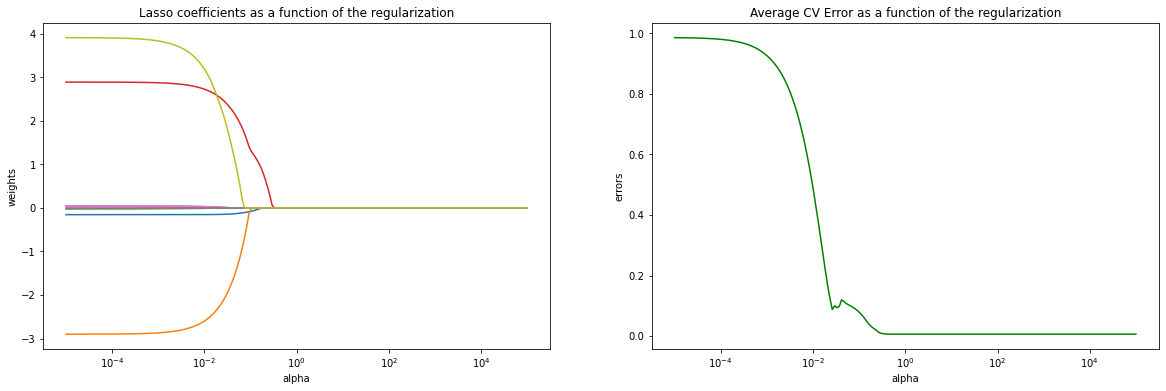

In [43]:
#Using graph for choosing the best alpha
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas,coefficient)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, average_cv_error,c='g')
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("errors")
plt.title("Average CV Error as a function of the regularization")
plt.axis("tight")
print('minimum cv error ',str(min(average_cv_error)))
plt.show()

In [44]:
lasso_metric = pd.DataFrame()
lasso_metric['alpha'] = alphas
lasso_metric['average_cv'] = average_cv_error


In [45]:
# get the alpha that corresponds to the lowest cv score
lasso_metric.loc[lasso_metric['average_cv'] == min(lasso_metric['average_cv'])]

,alpha,average_cv
92,0.41987,0.00615
93,0.47138,0.00615
94,0.52920,0.00615
95,0.59411,0.00615
96,0.66699,0.00615
...,...,...
195,62949.88990,0.00615
196,70671.81274,0.00615
197,79340.96666,0.00615
198,89073.54639,0.00615


In [46]:
# The prediction with tuned model
model_lasso.set_params(alpha = 0.41987)
model_lasso.fit(X_train, y_train)
y_lasso_pred = model_lasso.predict(X_test)
print("Testing MSE:", mean_squared_error(y_test, y_lasso_pred))

Testing MSE: 3474.805809882059


When alpha = 0.41987 the model has the lowest CV error. When using tuned model to predict the testing set, the testing MSE is 3474.805809882059. This is smaller than that of linear regression and polynomial regression.

## 4.Ridge

In [47]:
model_ridge = Ridge(normalize=True)
coefficient = []
average_cv_error=[]
k=10
alphas = np.logspace(-5, 5, 200)

for a in alphas:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(X_train, y_train)
    coef=model_ridge.coef_
    coefficient.append(coef)
    cv_error=cross_val_score(model_ridge, X_train, y_train, cv=k)
    sum_=0
    for i in cv_error:
        sum_+=abs(i)
    average_cv_error.append(sum_/k)
    
ridge_min=min(average_cv_error)

minimum cv error  0.005948294168363111


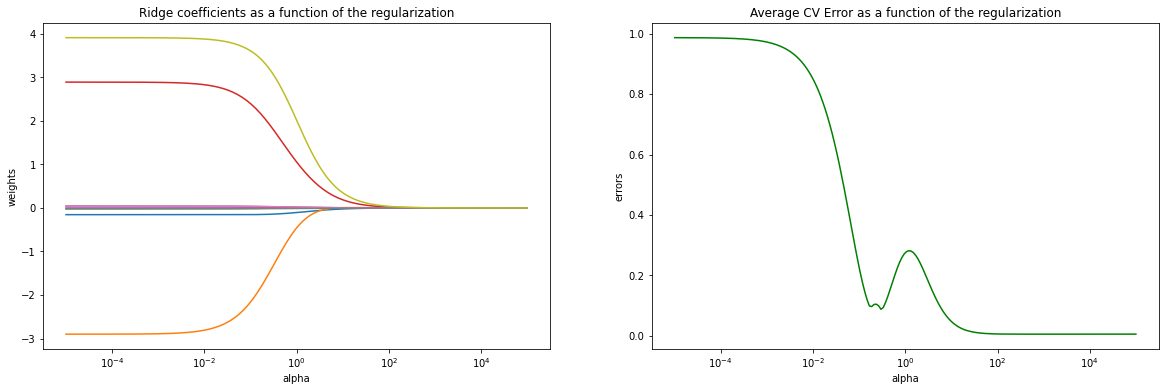

In [48]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas,coefficient)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, average_cv_error,c='g')
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("errors")
plt.title("Average CV Error as a function of the regularization")
plt.axis("tight")
print('minimum cv error ',str(min(average_cv_error)))
plt.show()

In [49]:
ridge_metric = pd.DataFrame()
ridge_metric['alpha'] = alphas
ridge_metric['average_cv'] = average_cv_error
ridge_metric

,alpha,average_cv
0,0.00001,0.98642
1,0.00001,0.98640
2,0.00001,0.98638
3,0.00001,0.98636
4,0.00002,0.98633
...,...,...
195,62949.88990,0.00614
196,70671.81274,0.00614
197,79340.96666,0.00614
198,89073.54639,0.00614


In [50]:
# get the alpha that corresponds to the lowest cv score
ridge_metric.loc[ridge_metric['average_cv'] == min(ridge_metric['average_cv'])]

,alpha,average_cv
148,273.64400,0.00595


In [51]:
# The prediction
model_ridge.set_params(alpha = 273.64400)
model_ridge.fit(X_train, y_train)
y_ridge_pred = model_ridge.predict(X_test)
print("Testing MSE:", mean_squared_error(y_test, y_ridge_pred))

Testing MSE: 3474.0727258497113


In [22]:
y_test

slug
lamden          0.07448
cheesecoin      0.00048
caluracoin      0.00433
tutti-frutti    0.00083
akash-network   3.57881
                  ...  
bankera         0.00091
ddkoin          0.56938
qbao            0.00711
ren             1.04397
masari          0.06204
Name: price, Length: 407, dtype: float64

When alpha = 273.64400 the model has the lowest CV error. When using tuned model to predict the testing set, the testing MSE is 3474.0727258497113. This is smaller than that of linear regression and polynomial regression，and slightlly smaller than lasso regression. Thus we should choose Ridge as our regression model. 

------

## Conclusion
By comparing the testing MSE from the above 4 models, we think Ridge Regression is the best model because it yields the lowest MSE. We can see 


This answered the question to find the most appropriate model for the prediction, and it is also possible for us to use this model to predict the price of cryptocurrecies when we have more information on its characteristics and market information on market cap and volume.

As an exmple, we use x_test to represent a future dataset we will get in order to predict prices.The ultimate prediction result will be Prediction_results:

In [23]:
Prediction_results = X_test.copy()
Prediction_results['price_predicted']=y_ridge_pred
Prediction_results 
# Get the predicition of the price

,cmc_rank,volume_24h,percent_change_7d,market_cap,'binance-smart-chain','collectibles-nfts','defi','mineable',circulating/total_supply,price_predicted
slug,,,,,,,,,,
lamden,36.06679,0.00050,15.42626,0.01465,0.00000,0.00000,0.00000,0.00000,1.08345,7.97142
cheesecoin,82.52319,0.00000,12.33925,0.00027,0.00000,0.00000,0.00000,100.00000,2.19489,7.92528
caluracoin,88.71985,0.00000,8.11691,0.00010,0.00000,0.00000,0.00000,0.00000,2.19046,7.93597
tutti-frutti,89.31354,0.00001,12.40609,0.00009,100.00000,0.00000,0.00000,0.00000,0.17993,7.92267
akash-network,8.42301,0.00192,9.38222,0.54621,0.00000,0.00000,0.00000,0.00000,1.52002,8.00669
...,...,...,...,...,...,...,...,...,...,...
bankera,27.08720,0.00000,12.15054,0.03135,0.00000,0.00000,0.00000,0.00000,2.18602,7.99470
ddkoin,65.89981,0.00003,13.37781,0.00134,0.00000,0.00000,0.00000,100.00000,0.08330,7.91209
qbao,74.54545,0.00000,12.09320,0.00064,0.00000,0.00000,0.00000,0.00000,1.43436,7.93947


In [30]:
# example
print("Predicted Price for akash-network is ", str(Prediction_results['price_predicted']['akash-network']),
      "Actual price for akash-network is",str(crypto['price']['akash-network']))

Predicted Price for akash-network is  8.006692316725664 Actual price for akash-network is 3.578814805206902


We should buy akash-network.

## Future Work
- Time:This project is limited in time, so we didn't go beyond the project requirements to implement other methods.
- Data constraints: This dataset is limited in its scale. We only used data with price < 500 ( see in datacleaning file), therefore it is possible for us to include more data into the prediction process. Also, we can aggregate data from previous months,years to make the prediction more complicated.
- Additional Methodoligies: It is also worth exploring using decision tree to predict the price. 
- Other paths or insights to explore: Another way to explore the prices of cryptocurrencies is through time series analysis. It is possible for us to get the time series data of the cryptocurrencies and use time series algorithms such as ARIMA to predict its prices. It is also possible to implement the unsupervised learning on the time series data to generate more insights. 
- There could also be other vairables that can play a major role in our prediction, we could attempt to find additional data through web scrapping, or exploring forums. 




## Reference
ALl coursematerials: Labs, Homeworks, Midterms, Inclass-exercises

https://www.mlq.ai/price-prediction-with-linear-regression/

## Appendix

This dataset doesn't have a lot of columns so feature selection is not urgent and necessary. However we can still try:
#### Feature Selection 

In [24]:
from sklearn.feature_selection import SequentialFeatureSelector
#crypto1 = whr_clean_sample.drop(['country'],axis=1)
# only used the 'train data' ( the data excluding year 2020)
Y_sfs= Y.copy()
X_sfs= X.copy()
CV_scores_sfs = []
predictors =X.columns
model= LinearRegression()

for feats in range(1, len(predictors)-1):
    print("Num Features:",feats)
    sfs = SequentialFeatureSelector(model, 
                                    n_features_to_select = feats, 
                                    direction="forward",
                                    scoring='neg_mean_squared_error',
                                    cv=10) 
    sfs = sfs.fit(X_sfs,Y_sfs)
    print("\tFeatures selected:", list(predictors[sfs.get_support()]))
    X_subset = sfs.transform(X_sfs)
    cross_val=cross_val_score(model, X_subset,Y_sfs, cv=10, scoring='neg_mean_squared_error')
    print(cross_val)
    CV_error = np.mean(cross_val)
    CV_scores_sfs.append(CV_error)
    print("\tCV_Error: %10.7f"%CV_error)

Num Features: 1
	Features selected: ['cmc_rank']
[-5447.12418776 -3841.89074641 -1464.86277339 -2068.9508149
 -2738.18400213 -1315.02352712 -1389.10299739  -526.05236331
   -97.38344904   -39.0659867 ]
	CV_Error: -1892.7640848
Num Features: 2
	Features selected: ['cmc_rank', "'defi'"]
[-5465.42746516 -3815.26624805 -1438.87957223 -2035.10828725
 -2722.45923687 -1340.36344082 -1409.37681417  -507.47423799
  -100.8942635    -37.67949246]
	CV_Error: -1887.2929058
Num Features: 3
	Features selected: ['cmc_rank', 'percent_change_7d', "'defi'"]
[-5463.19546689 -3814.04842568 -1437.35193877 -2037.77306567
 -2722.41633105 -1341.86230638 -1410.30489743  -513.08851665
  -103.71884784   -40.43700326]
	CV_Error: -1888.4196800
Num Features: 4
	Features selected: ['cmc_rank', 'percent_change_7d', "'binance-smart-chain'", "'defi'"]
[-5461.20326415 -3819.12217573 -1435.60463444 -2049.44230777
 -2720.38629593 -1339.11930388 -1411.02200922  -514.11074333
  -103.9732555    -42.87338158]
	CV_Error: -1889.

Features selected should be ['cmc_rank', "'defi'"], with the smallest CV error.